# Régression Linéaire Multiple


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# 1. Dataset

In [9]:
dataset = pd.read_csv('Advertising.csv')

In [10]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


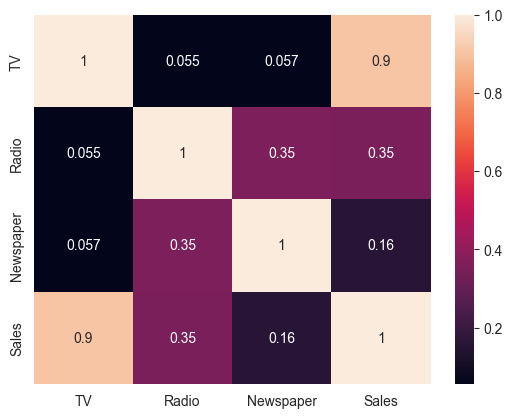

In [11]:
plt.figure()
sns.heatmap(dataset.corr(),annot=True)
plt.show()

### Prédiction des ventes en fonction des dépenses publicitaires en TV, Radio et Newspapers.

In [13]:
x = dataset[['TV', 'Radio', 'Newspaper']].values
y = dataset[['Sales']].values

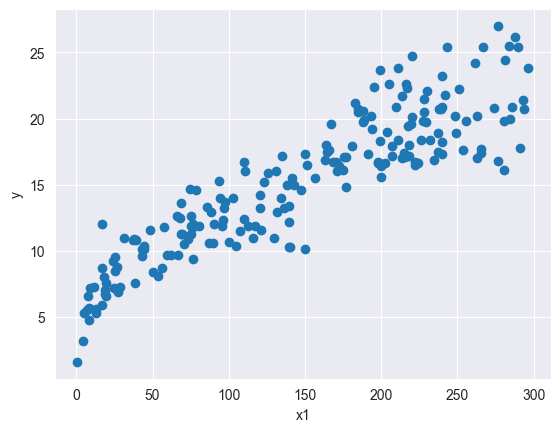

In [15]:
plt.scatter(x[:,0], y) 
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

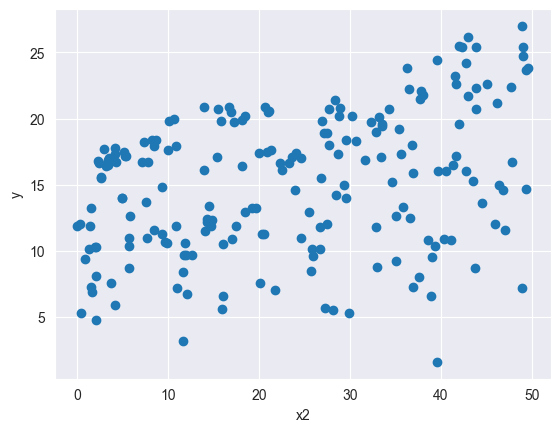

In [16]:
plt.scatter(x[:,1], y)
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

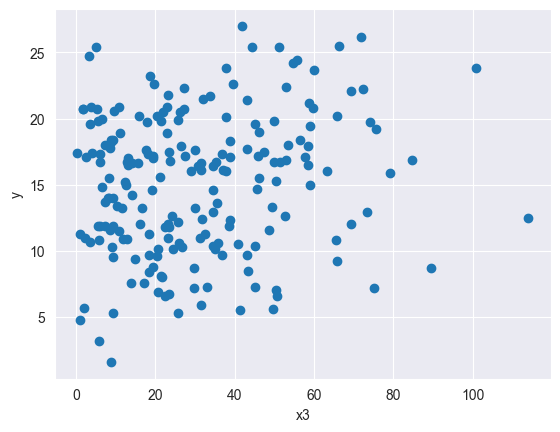

In [18]:
plt.scatter(x[:,2], y)
plt.xlabel('x3')
plt.ylabel('y')
plt.show()

In [21]:
# Verification des dimensions
print(x.shape)
print(y.shape)

(200, 3)
(200, 1)


In [22]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones((x.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)
print(X.shape)
print(X[:10])

(200, 4)
[[230.1  37.8  69.2   1. ]
 [ 44.5  39.3  45.1   1. ]
 [ 17.2  45.9  69.3   1. ]
 [151.5  41.3  58.5   1. ]
 [180.8  10.8  58.4   1. ]
 [  8.7  48.9  75.    1. ]
 [ 57.5  32.8  23.5   1. ]
 [120.2  19.6  11.6   1. ]
 [  8.6   2.1   1.    1. ]
 [199.8   2.6  21.2   1. ]]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 4)
(40, 4)
(160, 1)
(40, 1)


In [24]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(4, 1)
theta

array([[-0.04845634],
       [ 0.44319693],
       [ 0.30132083],
       [-0.96767936]])

## 2. Modèle Linéaire

On implémente un modèle selon l’équation matricielle F=X.θ et puis on teste le modèle initiale défini par la valeur initiale de θ qu’on a initialisé d’une manière aléatoire.

In [25]:
def model(X, theta):
    return X.dot(theta)

## 3. Fonction coût : Erreur Quadratique Moyenne

On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais.

In [26]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [27]:
cost_function(X_train, y_train, theta)

87.91662937270624

## 4. Gradients et Descente de Gradient

In [28]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [29]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

## 5. Phase d'entrainement

On définit un nombre d’itérations, ainsi qu’un pas d’apprentissage α. Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [30]:
n_iterations = 2000000
learning_rate = 0.00001

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

In [31]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X_test, theta_final)

theta_final

array([[0.0555067 ],
       [0.10446978],
       [0.00684774],
       [4.35947064]])

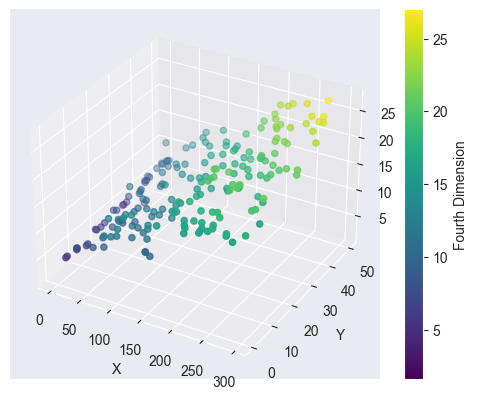

In [34]:
from mpl_toolkits.mplot3d import Axes3D

x = dataset["TV"]
y = dataset["Radio"]
z = dataset["Newspaper"]
w = dataset["Sales"] 

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Represent the fourth dimension using color
sc = ax.scatter(x, y, w, c=w, cmap='viridis')
plt.colorbar(sc, label='Fourth Dimension')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## 6. Courbe d'apprentissage

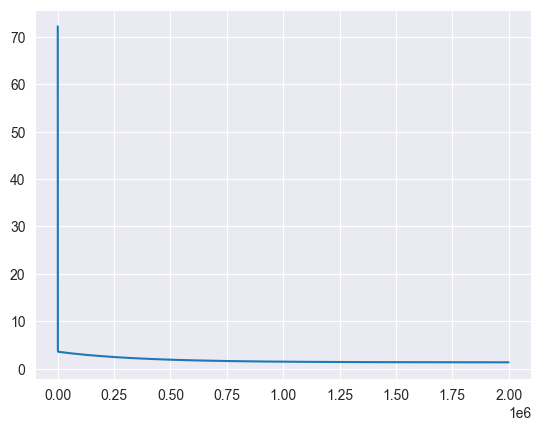

In [35]:
plt.plot(range(n_iterations), cost_history)
plt.show()

## 7. Evaluation du modèle - Coefficient de détermination

In [36]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [37]:
predictions = model(X_train, theta_final)
coef_determination(y_train, predictions)

0.8994903720874743

In [38]:
predictions = model(X_test, theta_final)
coef_determination(y_test, predictions)

0.9063048758308623